##Predicting the possibility of telecom customer churn

**Which customers are likely to churn?**
**What are the attributes of the churn customers?**


✅ DATA DESCRIPTION

*   List item
*   customerID - customer id

*   gender - client gender (male / female)

*   SeniorCitizen - is the client retired (1, 0)

*   Partner - is the client married (Yes, No)

*   tenure - how many months a person has been a client of the company

*   PhoneService - is the telephone service connected (Yes, No)

*   MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

*    InternetService - client’s Internet service provider (DSL, Fiber optic, No)

*   OnlineSecurity - is the online security service connected (Yes, No, No internet service)

*   OnlineBackup - is the online backup service activated (Yes, No, No internet service)

*   DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

*   TechSupport - is the technical support service connected (Yes, No, No internet service)

*   StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

*   StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

*   Contract - type of customer contract (Month-to-month, One year, Two year)

*   PaperlessBilling - whether the client uses paperless billing (Yes, No)

*   PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

*   MonthlyCharges - current monthly payment

*   TotalCharges - the total amount that the client paid for the services for the entire time

*   Churn - whether there was a churn (Yes or No)



In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00

In [ ]:
## FUNCTIONS LOAD
import pandas as pd
import numpy as np


In [ ]:
## DATA UPLOAD
# Load the California housing dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/Data/telecom_users.csv')
df.head(10)

Mounted at /content/drive


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
## CHECK MISSING VALUES
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
##MANAGE DUPLICATED CUSTOMER IDS & UNNECESSARY COLUMNS
df['customerID'].drop_duplicates()
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
#CHECK OUTCOME DATA BALANCE : IMBALANCED
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [ ]:
#DUMMY CODE THE OUTCOME DATA: CHURN AS '1', OTHERWISE '0'
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,0
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,0
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,0


## EXPLORATORY DATA ANALYSIS

Check the data distribution of customer features

In [ ]:
## DATA VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.dtypes.value_counts()

object     17
int64       3
float64     1
dtype: int64

In [ ]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
# list(df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,0.265119
std,0.367909,24.516391,30.114702,0.441433
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,0.000000
50%,0.000000,29.000000,70.400000,0.000000
75%,0.000000,56.000000,89.900000,1.000000
max,1.000000,72.000000,118.750000,1.000000


<ipython-input-13-a0069f643cd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");


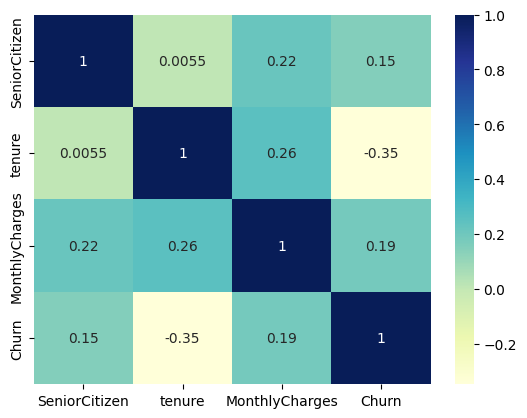

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

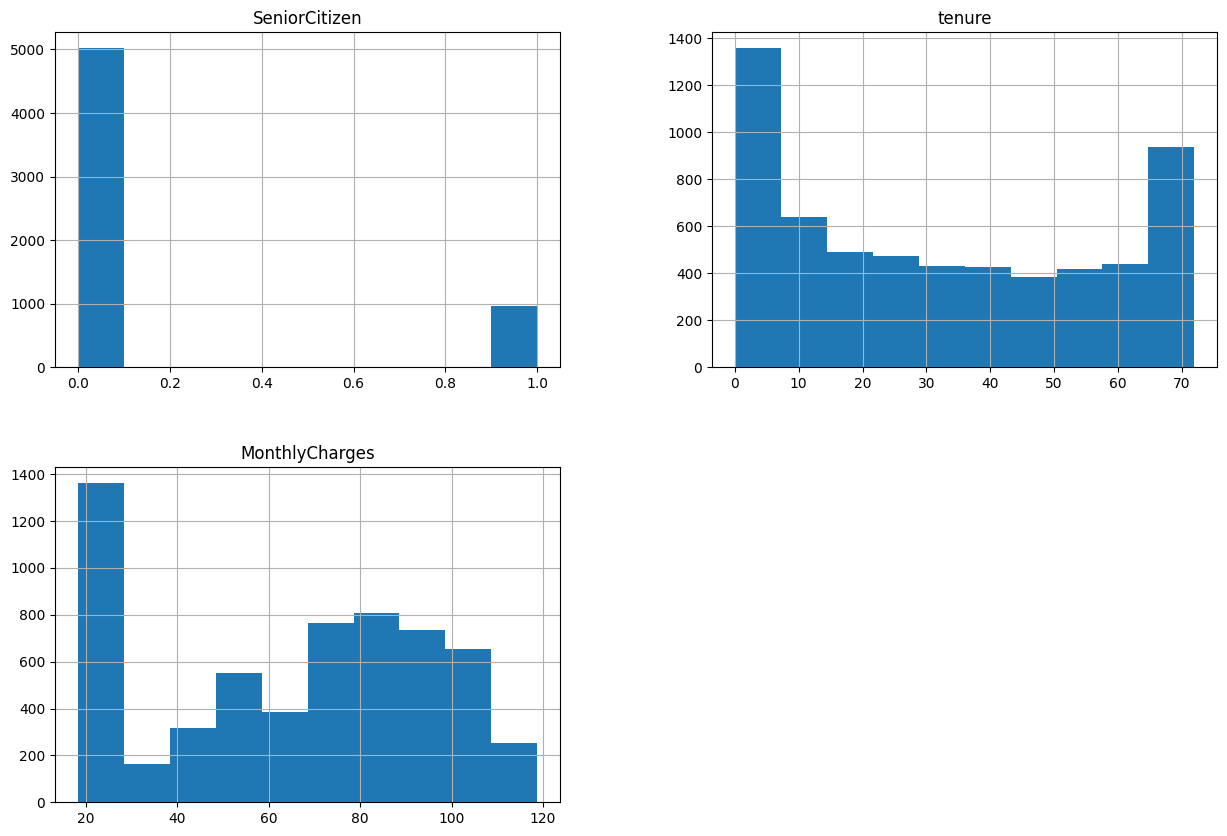

In [ ]:
df[['SeniorCitizen','tenure','MonthlyCharges']].hist(figsize=(15, 10));

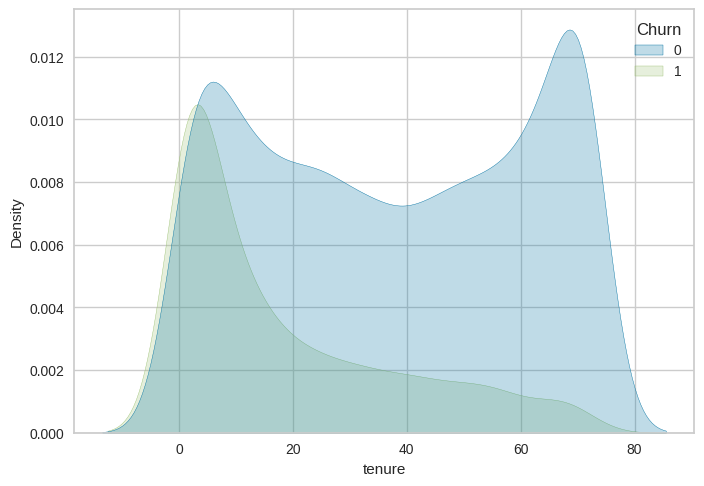

In [ ]:
sns.kdeplot(x='tenure', hue='Churn', data=df, shade=True);

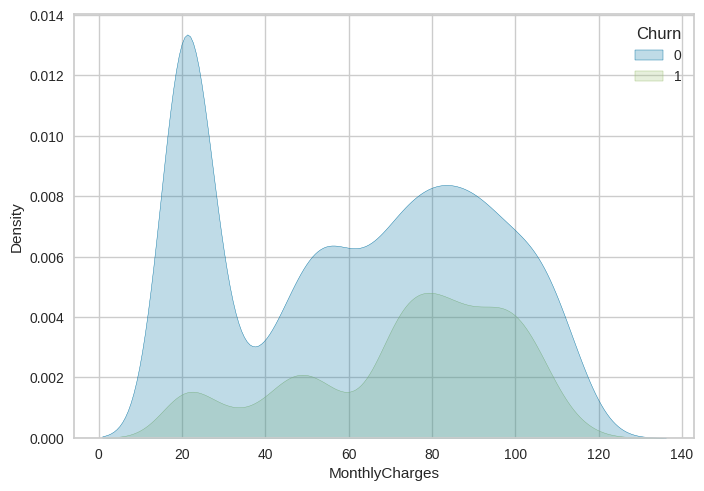

In [ ]:
sns.kdeplot(x='MonthlyCharges', hue='Churn', data=df, shade=True);

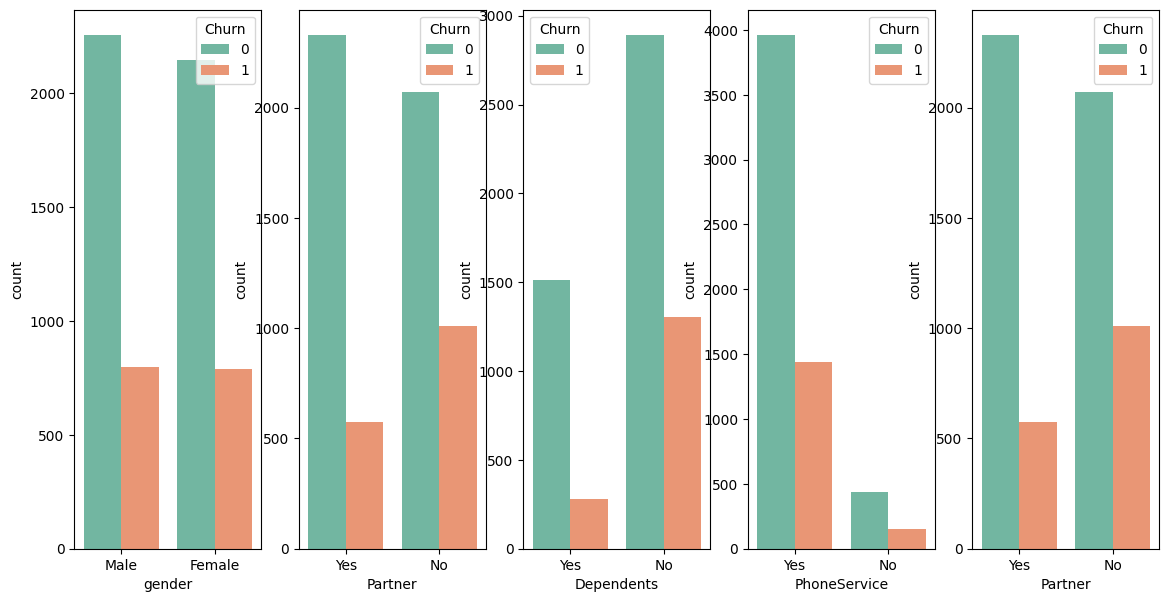

In [ ]:
figure, ax =plt.subplots(1,5, figsize=(14,7))
sns.countplot(x='gender',hue='Churn', data=df, palette = "Set2", ax=ax[0])
sns.countplot(x='Partner',hue='Churn', data=df, palette = "Set2", ax=ax[1])
sns.countplot(x='Dependents',hue='Churn', data=df, palette = "Set2", ax=ax[2])
sns.countplot(x='PhoneService',hue='Churn', data=df, palette = "Set2", ax=ax[3])
sns.countplot(x='Partner',hue='Churn', data=df, palette = "Set2", ax=ax[4])
figure.show();

In [ ]:
X = df.drop(columns=['Churn', 'customerID'])
y = df[['Churn']]

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5


In [ ]:
y.isnull().sum()

Churn    0
dtype: int64

#Data visualization: Customer Churn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

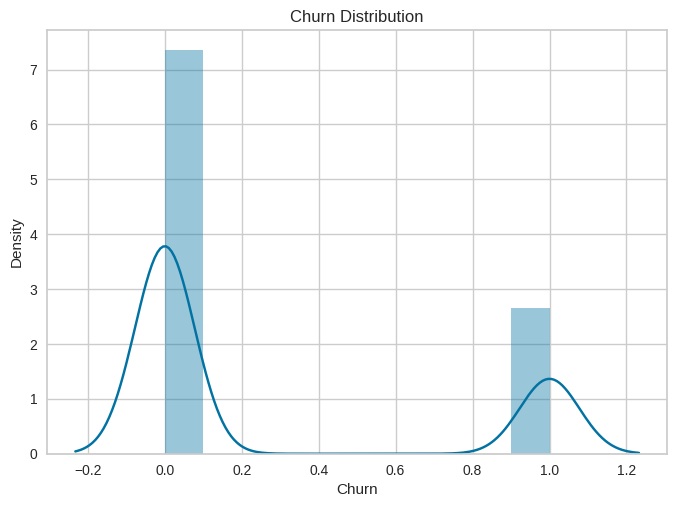

In [ ]:
sns.distplot(y['Churn'])
plt.title("Churn Distribution");

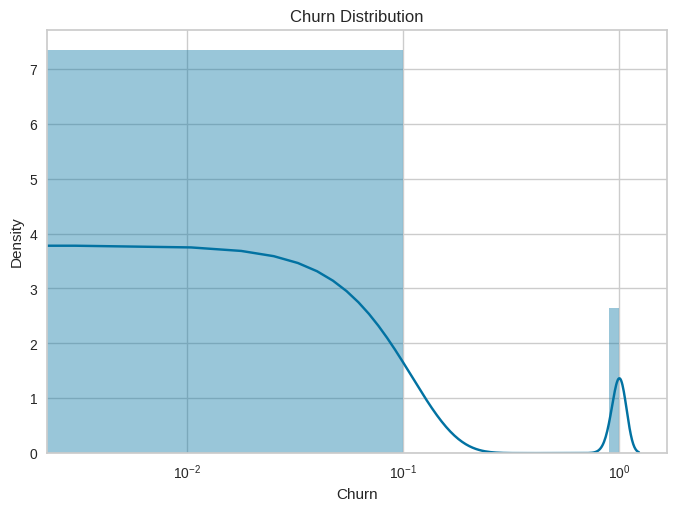

In [ ]:
sns.distplot(y['Churn'])
plt.xscale('log')
plt.title("Churn Distribution");

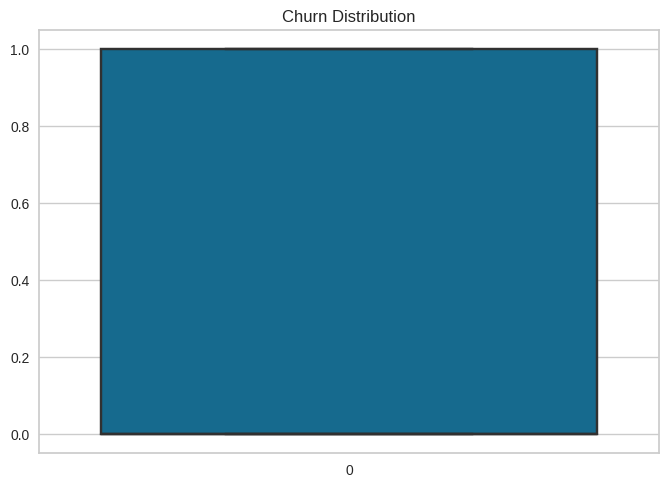

In [ ]:
sns.boxplot(y['Churn'])
plt.title("Churn Distribution");

I could visualize outliers(customers who churn) using displot but not with box plot, which means that customers who churn are less than 0.25. In the next step, I re-confirm this by checking customer churn in relation with other customer features.

## Model: 1. The 3-sigma Model

Here, I compute mean and standard deviation and use the 3-STD (3-sigma) rule to compute the lower and upper limit.

For the detail,

LL = mean - 3sigma
UL = mean + 3sigma

My aim is to find out if each row of data is an outlier or not based on the customer features such as (`tenure`) or (`MonthlyCharges`) column from `X` and compute performance using the ground truth labels in `y` using `classification_report`

In [ ]:
#Testing outliers of Churning with Tenure
mean = X['tenure'].mean()
sigma = X['tenure'].std()

UL = mean + 3*sigma
LL = mean - 3*sigma

# LL, UL
outliers = [1 if ((value < LL) or (value > UL)) else 0 for value in X['tenure']]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, outliers))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      4399
           1       0.00      0.00      0.00      1587

    accuracy                           0.73      5986
   macro avg       0.37      0.50      0.42      5986
weighted avg       0.54      0.73      0.62      5986



In [ ]:
# Testing Customer Churn with MonthlyCharges
mean = X['MonthlyCharges'].mean()
sigma = X['MonthlyCharges'].std()

UL = mean + 3*sigma
LL = mean - 3*sigma

# LL, UL
outliers = [1 if ((value < LL) or (value > UL)) else 0 for value in X['MonthlyCharges']]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, outliers))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      4399
           1       0.00      0.00      0.00      1587

    accuracy                           0.73      5986
   macro avg       0.37      0.50      0.42      5986
weighted avg       0.54      0.73      0.62      5986



From this 3-sigma model prediction results, I could know that the amount of outliers in churning will be a less than 3-sigma in relation to 'tenure' or montly charges. Thus, I move on to test it with Isolatio Forest model, in which I could test it with the less than 0.1. 

## Model: 2. The Isolation Forest Model

Now use IForest for outlier detection and evaluate its performance and visualize the outliers.

I use a default contamination rate of 0.1 for this model

In [ ]:
from pyod.models import iforest
#checking customer churn with tenure
if_model = iforest.IForest(contamination=0.1)
if_model.fit(X[['tenure']])

outliers = if_model.predict(X[['tenure']])

In [ ]:
print(classification_report(y, outliers))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79      4399
           1       0.08      0.03      0.04      1587

    accuracy                           0.66      5986
   macro avg       0.40      0.46      0.42      5986
weighted avg       0.55      0.66      0.59      5986



In [ ]:
#checking customer churn with Monthlycharges
if_model = iforest.IForest(contamination=0.1)
if_model.fit(X[['MonthlyCharges']])

outliers = if_model.predict(X[['MonthlyCharges']])
print(classification_report(y, outliers))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      4399
           1       0.21      0.08      0.12      1587

    accuracy                           0.68      5986
   macro avg       0.47      0.49      0.46      5986
weighted avg       0.59      0.68      0.62      5986



The result of the Iforest showed that MonthlyCharges better predict customer churn than other customer feature such as tenure. 


Although these univariate regression method is useful to predict customer churn with each customer feature, it is also interesting to run Multivariate regression to see multiple features' prediction of customer churn. 

##SUPERVISED MACHINE LEARNING MODEL##









In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4788, 19), (1198, 19))

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
# Define feature / target columns

categorical_features_X = X_train.select_dtypes(include='object')
# categorical_features_y = y_train.select_dtypes(include='object')

numeric_features = X_train.select_dtypes(exclude='object')

categorical_features_X, numeric_features

(      gender Partner Dependents PhoneService     MultipleLines  \
 5737  Female     Yes         No          Yes               Yes   
 829   Female      No         No           No  No phone service   
 2694    Male      No         No          Yes               Yes   
 1496  Female     Yes        Yes          Yes               Yes   
 438   Female      No         No          Yes                No   
 ...      ...     ...        ...          ...               ...   
 3772    Male     Yes         No          Yes               Yes   
 5191    Male     Yes        Yes          Yes                No   
 5226    Male      No         No          Yes                No   
 5390  Female     Yes        Yes          Yes                No   
 860   Female     Yes         No          Yes                No   
 
      InternetService       OnlineSecurity         OnlineBackup  \
 5737              No  No internet service  No internet service   
 829              DSL                   No                  

In [ ]:
#PREPROCESS WITHOUT PIPELINE
## CATEGORICAL FEATURES -X
### Step 1: SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_cols = categorical_features_X.columns
cat_imputer = SimpleImputer(strategy='constant',
                            fill_value='Not Available')
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(categorical_features_X),
                           columns=cat_cols)

### Step 2: OneHotEncoder to dummy code.


cat_dummy_encoder = OneHotEncoder(handle_unknown='ignore', )
X_train_cat_ohe = cat_dummy_encoder.fit_transform(X_train_cat).toarray()
cat_ohe_cols = cat_dummy_encoder.get_feature_names_out(cat_cols)
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,
                      columns=cat_ohe_cols)
X_train_cat_ohe.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_996.85,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## NUMERIC FEATURES 
### Step 1: KNNImputer
from sklearn.impute import KNNImputer

num_cols = numeric_features.columns
knn_imp = KNNImputer(n_neighbors=5)
X_train_num = pd.DataFrame(knn_imp.fit_transform(numeric_features),
                           columns=num_cols)
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,1.0,28.0,25.70
1,0.0,6.0,47.95
2,0.0,55.0,96.80
3,0.0,54.0,59.80
4,0.0,29.0,19.35


In [ ]:
### Step 2: Scaling. 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ss = StandardScaler()
X_train_num_scaled = ss.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled,
                                  columns=num_cols)
X_train_num_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,2.253030,-0.188386,-1.308957
1,-0.443847,-1.085929,-0.569011
2,-0.443847,0.913145,1.055543
3,-0.443847,0.872348,-0.174928
4,-0.443847,-0.147588,-1.520132


In [ ]:
### COMBINE CATEGORICAL- and NUMERIC X Train data sets

X_train = pd.concat([X_train_num_scaled, X_train_cat_ohe], axis=1)
final_columns = X_train.columns.tolist()
# just to maintain a proper column order
X_train = X_train[final_columns]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Columns: 4595 entries, SeniorCitizen to TotalCharges_999.9
dtypes: float64(4595)
memory usage: 167.9 MB


In [ ]:
# separate into cat and num features
X_test_cat = X_test[cat_cols]
X_test_num = X_test[num_cols]

# impute 'not available' for missing categorical data
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test_cat), columns=cat_cols)
# one hot encoding to encode categorical features
X_test_cat_ohe = cat_dummy_encoder.transform(X_test_cat).toarray()
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,
                               columns=cat_ohe_cols)

# knn imputation for num features
X_test_num = pd.DataFrame(knn_imp.transform(X_test_num), columns=num_cols)
# standard scale num features
X_test_num_scaled = ss.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled,
                                  columns=num_cols)

X_test = pd.concat([X_test_num_scaled, X_test_cat_ohe], axis=1)
X_test = X_test[final_columns]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Columns: 4595 entries, SeniorCitizen to TotalCharges_999.9
dtypes: float64(4595)
memory usage: 42.0 MB


In [ ]:
y_train.value_counts()

Churn
0        3504
1        1284
dtype: int64

In [ ]:
combined_df = pd.concat([X_train, y_train], axis=1)
combined_df = combined_df.dropna(subset=['Churn'])

In [ ]:
combined_df = combined_df.fillna(combined_df.median())

#MULTIVARIATE PREDICTIONS#

In [ ]:
from pyod.models import iforest

if_model = iforest.IForest(n_estimators=100, contamination=0.01)
if_model.fit(combined_df)

outlier_predictions = if_model.predict(combined_df)

outliers_df = combined_df.copy(deep=True)
outliers_df['outliers'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Churn'] == 1]

print('Total Outliers:', len(outliers_df))


Total Outliers: 1284


In [ ]:
outliers_df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_996.85,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn,outliers
2,-0.443847,0.913145,1.055543,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
11,2.253030,0.953943,0.112736,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
18,2.253030,-0.759550,-1.510155,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
19,-0.443847,0.219589,1.200206,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
24,-0.443847,-0.637157,-0.317929,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
outliers_sorted = outliers_df.sort_values(by=['Churn'],ascending=False)
outliers_sorted.head(10)

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_996.85,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn,outliers
2,-0.443847,0.913145,1.055543,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3643,2.253030,-1.249119,-0.690396,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3914,-0.443847,1.606702,0.017956,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3913,-0.443847,-0.800347,-1.510155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3909,-0.443847,-1.289916,-0.130033,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3905,-0.443847,-0.433170,0.797809,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3895,-0.443847,0.505171,1.333230,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3888,-0.443847,-1.249119,0.348853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3885,-0.443847,0.260386,-0.475895,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3884,-0.443847,-1.249119,-1.485213,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


#LOW CODE WITH PYCARET#

In [ ]:
from pycaret.classification import *

clf = setup(data=combined_df, 
            target ='Churn', 
            session_id=13, 
            max_encoding_ohe=600, # columns with 600 or less categories will be One-hot encoded ELSE target encoding
            rare_to_value=0.008, # Categories with less than 0.008 of the data will be grouped into a new category (Other)
            rare_value='Other',
            experiment_name='swiss1',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(4788, 4596)"
4,Transformed data shape,"(4788, 4596)"
5,Transformed train set shape,"(3351, 4596)"
6,Transformed test set shape,"(1437, 4596)"
7,Numeric features,4595
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#Train and Compare models
best_model = compare_models(fold=5, sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.2793,0.5008,0.9788,0.2686,0.4215,0.0009,0.0056,1.1920
dt,Decision Tree Classifier,0.6726,0.5003,0.1435,0.2775,0.1883,0.0112,0.0111,0.8780
xgboost,Extreme Gradient Boosting,0.6819,0.5064,0.1168,0.2750,0.1635,0.0068,0.0070,0.6040
knn,K Neighbors Classifier,0.6834,0.5086,0.1112,0.2771,0.1581,0.0054,0.0065,2.2260
lightgbm,Light Gradient Boosting Machine,0.6944,0.4996,0.0657,0.2369,0.1025,-0.0125,-0.0177,0.9280
svm,SVM - Linear Kernel,0.7258,0.0000,0.0233,0.3389,0.0412,0.0090,0.0190,0.6420
ridge,Ridge Classifier,0.7281,0.0000,0.0100,0.3324,0.0194,0.0021,0.0102,0.6140
et,Extra Trees Classifier,0.7275,0.5067,0.0089,0.2722,0.0171,-0.0001,-0.0006,0.6860
rf,Random Forest Classifier,0.7296,0.5003,0.0067,0.4111,0.0129,0.0020,0.0141,0.6600
ada,Ada Boost Classifier,0.7317,0.4857,0.0033,0.3000,0.0066,0.0031,0.0172,0.9620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

The above result showed that Naive Bayes and Decision Tree classifier is the best working model to predict customer churn. In specific, this means that these two models predict the best for the customer who are likely to churn with less errors for failing to predict it.

#FEATURE IMPORTANCE ANALYSIS WITH NAIVE BAYES MODEL##

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2917,0.5127,0.9889,0.2730,0.4279,0.0139,0.0664
1,0.2776,0.4974,0.9663,0.2646,0.4155,-0.0028,-0.0136
2,0.2746,0.4865,0.9444,0.2632,0.4116,-0.0148,-0.0644
3,0.2776,0.4956,0.9667,0.2669,0.4183,-0.0048,-0.0242
4,0.2836,0.5032,0.9778,0.2699,0.4231,0.0035,0.0174
5,0.2896,0.5143,1.0000,0.2744,0.4306,0.0156,0.0885
6,0.2657,0.4874,0.9667,0.2636,0.4143,-0.0137,-0.0920
7,0.2866,0.5087,0.9889,0.2722,0.4269,0.0095,0.0507
8,0.2836,0.4997,0.9667,0.2685,0.4203,-0.0004,-0.0017


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.4 MB/s eta 0:00:00


In [ ]:
# Scale the data to [0,1] range to avoid negative values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

  0%|          | 0/1198 [00:00<?, ?it/s]

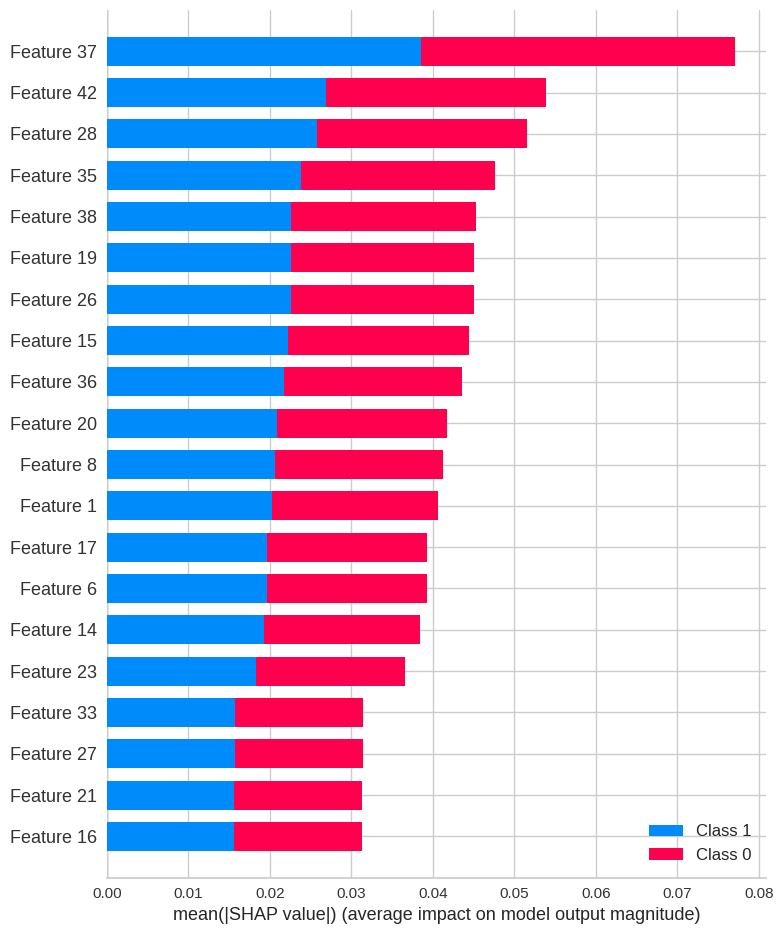

In [ ]:
import shap
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Initialize SHAP explainer
background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(nb.predict_proba, background)

# Get SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

The above SHAP model showed that feature 37 is the most powerful predictor of customer Churn. To know more information about it, I moved on to the second best model of supervised machine learning for customer churn,the decision tree model. Using low-code method, it is easier to extract the feature names.

#Feature Importance with Decision Tree model.

In [ ]:
#Create models

dt = create_model('dt',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6721,0.4790,0.1111,0.2500,0.1538,-0.0135,-0.0152
1,0.6642,0.5124,0.1620,0.2788,0.2049,0.0107,0.0113
2,0.6836,0.5377,0.2056,0.3491,0.2587,0.0744,0.0786
3,0.6731,0.4788,0.0889,0.2254,0.1275,-0.0289,-0.0336
4,0.6701,0.4937,0.1500,0.2842,0.1964,0.0132,0.0143
Mean,0.6726,0.5003,0.1435,0.2775,0.1883,0.0112,0.0111
Std,0.0063,0.0224,0.0407,0.0416,0.0451,0.0353,0.0381


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

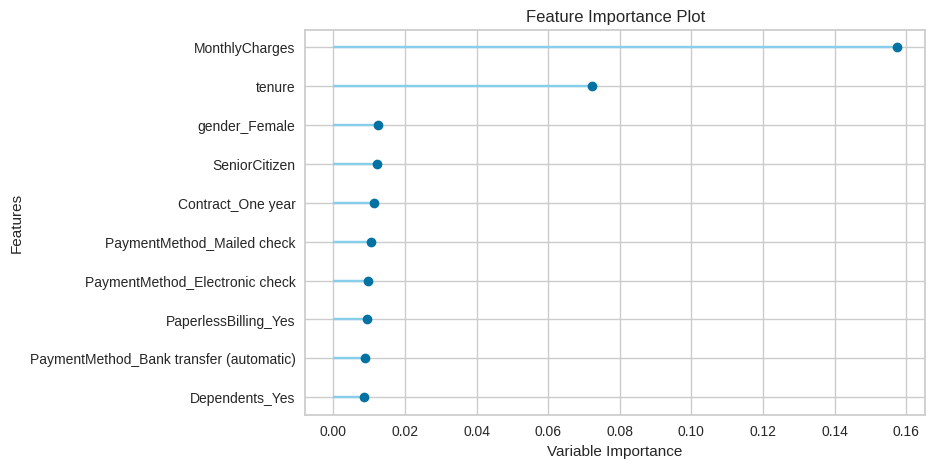

In [ ]:
plot_model(dt, plot='feature')

The above result of the feature importance showed that Monthly charges and tenure(long-term customer) explained the most of the variability of customer churn. 

ANALYZING MODEL PERFORMANCE DIAGNOSTICS

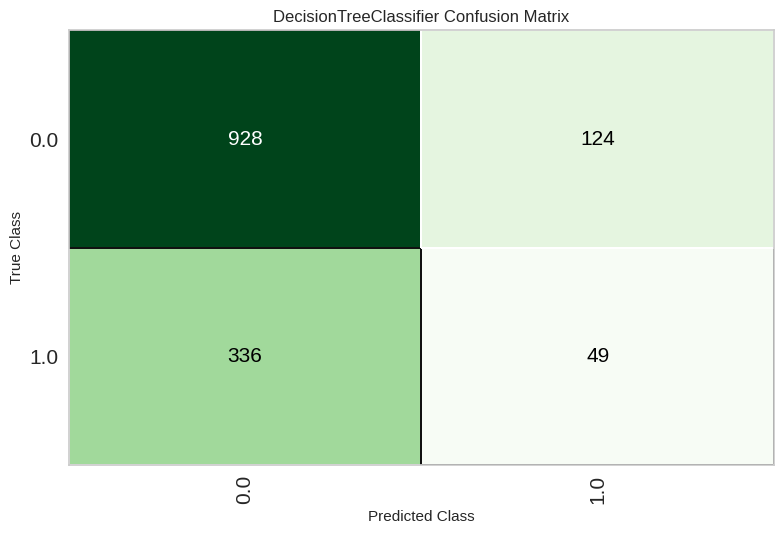

In [ ]:
plot_model(dt, plot='confusion_matrix')